In [240]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h1> Algoritmo de ordenamiento QuickSort </h1>

In [241]:
def quicksort(lista):

    if len(lista) < 2:
        return lista

    izquierda, pivote, derecha = divide(lista)

    return quicksort(izquierda) + pivote + quicksort(derecha)

def divide(lista):

    pivote = lista[:1]

    izquierda =[]
    derecha = []

    for i in xrange(1, len(lista)):
        if(lista[i] < pivote[0]):
            izquierda.append(lista[i])
        else:
            derecha.append(lista[i])

    return izquierda, pivote, derecha

In [242]:
A = [10,5,4,6,22,8,98,1]
A = quicksort(A)
print A

[1, 4, 5, 6, 8, 10, 22, 98]


<h2> Correctitud </h2>

Se verifica que en todo momento los elementos del vector de la izquierda sean menores al pivote y los elementos del vector de la derecha sean mayores o iguales al pivote.

In [243]:
def invariant(menores, pivote, mayores):
    correcto = True;
    
    if(len(menores)>=1):        
        if(pivote[0] <= max(menores)):
            correcto = False;
            
    if(len(mayores)>=1):        
        if(pivote[0] > min(mayores)):
            correcto = False;
        
    print menores, " - ", pivote, " - ", mayores
        
    return correcto

In [244]:
def correctitud_quicksort(lista):

    if len(lista) < 2:
        return lista

    izquierda, pivote, derecha = correctitud_divide(lista)

    return correctitud_quicksort(izquierda) + pivote + correctitud_quicksort(derecha)

def correctitud_divide(lista):

    pivote = lista[:1]

    izquierda =[]
    derecha = []

    for i in xrange(1, len(lista)):
        if(lista[i] < pivote[0]):
            izquierda.append(lista[i])
        else:
            derecha.append(lista[i])
            
    print invariant(izquierda, pivote, derecha)

    return izquierda, pivote, derecha

In [245]:
A = [10,5,4,6,22,8,98,1]
A = correctitud_quicksort(A)
print A

[5, 4, 6, 8, 1]  -  [10]  -  [22, 98]
True
[4, 1]  -  [5]  -  [6, 8]
True
[1]  -  [4]  -  []
True
[]  -  [6]  -  [8]
True
[]  -  [22]  -  [98]
True
[1, 4, 5, 6, 8, 10, 22, 98]


<h3> Número de Operaciones </h3>

Se calcula el número de operaciones que realiza el algoritmo para una lista de tamaño n.

In [246]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

def acct_quicksort(lista, acct):

    if len(lista) < 2:
        acct.count()
        return lista

    izquierda, pivote, derecha = acct_divide(lista, acct); acct.count()

    return acct_quicksort(izquierda, acct) + pivote + acct_quicksort(derecha, acct)

def acct_divide(lista, acct):

    pivote = lista[:1]; acct.count()

    izquierda =[]; acct.count()
    derecha = []; acct.count()

    for i in xrange(1, len(lista)):
        if(lista[i] < pivote[0]):
            acct.count()
            izquierda.append(lista[i])
        else:
            acct.count()
            derecha.append(lista[i])

    return izquierda, pivote, derecha

In [247]:
A = [10,5,4,6,22,8,98,1]
acct = Counter()
A = acct_quicksort(A, acct)
acct.print_steps()

Number of steps = 40


<h2> Análisis experimental </h2>

Se calcula el número de operaciones que realiza el algoritmo tomando listas de tamaño 1 hasta n.

In [248]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_quicksort(l, acct)
        results.append(acct.steps)
    return results

In [249]:
print exper_analysis(10)

[1, 1, 7, 14, 16, 25, 32, 28, 41, 60]


<h2> Análisis teórico </h2>

Se calcula T(n) para listas de tamaño 1 hasta n teniendo en cuenta que el algoritmo es de orden O(n log2 n).

In [250]:
import random as rnd
import math

def teoric_analysis(n):
    results = []
    for i in range(n):
        if(i == 0):
            l = 0
        else:
            l = i*np.log2(i)
        results.append(l)
    return results

In [251]:
print teoric_analysis(10)

[0, 0.0, 2.0, 4.7548875021634682, 8.0, 11.60964047443681, 15.509775004326936, 19.651484454403228, 24.0, 28.529325012980809]


<h2> Análisis de tiempo </h2>

Se calcula el tiempo de ejecución del algoritmo para listas de tamaño 1 hasta n.

In [252]:
import time

def time_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        quicksort(l)
        toc = time.clock()#get final time
        results.append((toc-tic)*1000000)
    return results

<h2> Comparación </h2>

In [253]:
print time_analysis(10)

[2.9999999995311555, 2.000000000279556, 7.000000000090267, 9.999999999621423, 10.00000000139778, 13.000000000928935, 18.000000000739647, 23.999999999801958, 25.000000000829914, 28.00000000036107]


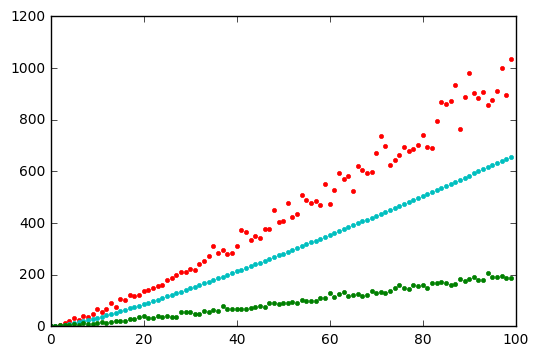

In [254]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.', color ='r')
z = np.array(teoric_analysis(100))
pl.plot(x, z, 'k.', color='c')
w = np.array(time_analysis(100))
pl.plot(x, w, 'k.', color='g')